In [1]:
# Импорт необходимых библиотек
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.neighbors import KNeighborsClassifier, KNeighborsRegressor
from sklearn.metrics import accuracy_score, mean_squared_error
import matplotlib.pyplot as plt

# Загрузка данных
# Классификация
def upload_classification_data():
    from google.colab import files
    uploaded = files.upload()
    klass_df = pd.read_csv(list(uploaded.keys())[0])
    return klass_df

# Регрессия
def upload_regression_data():
    from google.colab import files
    uploaded = files.upload()
    reg_df = pd.read_csv(list(uploaded.keys())[0])
    return reg_df

# Загрузка данных
print("Загрузите файл для задачи классификации")
klass_df = upload_classification_data()
print("Загрузите файл для задачи регрессии")
reg_df = upload_regression_data()


Загрузите файл для задачи классификации


Saving klass.csv to klass.csv
Загрузите файл для задачи регрессии


Saving reg.csv to reg.csv


In [2]:
# Обработка категориальных данных для классификации
categorical_columns_klass = klass_df.select_dtypes(include=['object']).columns
if len(categorical_columns_klass) > 0:
    for col in categorical_columns_klass:
        klass_df[col] = LabelEncoder().fit_transform(klass_df[col])

# Обработка категориальных данных для регрессии
categorical_columns_reg = reg_df.select_dtypes(include=['object']).columns
if len(categorical_columns_reg) > 0:
    for col in categorical_columns_reg:
        reg_df[col] = LabelEncoder().fit_transform(reg_df[col])

In [3]:
# Выбор метрик качества
# Для классификации - точность (accuracy)
# Для регрессии - среднеквадратичная ошибка (MSE)

# Разделение данных на тренировочные и тестовые наборы
X_klass = klass_df.iloc[:, :-1]
y_klass = klass_df.iloc[:, -1]
X_train_klass, X_test_klass, y_train_klass, y_test_klass = train_test_split(X_klass, y_klass, test_size=0.2, random_state=42)

X_reg = reg_df.iloc[:, :-1]
y_reg = reg_df.iloc[:, -1]
X_train_reg, X_test_reg, y_train_reg, y_test_reg = train_test_split(X_reg, y_reg, test_size=0.2, random_state=42)

# Нормализация данных
scaler = StandardScaler()
X_train_klass = scaler.fit_transform(X_train_klass)
X_test_klass = scaler.transform(X_test_klass)

X_train_reg = scaler.fit_transform(X_train_reg)
X_test_reg = scaler.transform(X_test_reg)

In [4]:
# Обучение базовых моделей KNN
# Классификация
knn_classifier = KNeighborsClassifier(n_neighbors=3)
knn_classifier.fit(X_train_klass, y_train_klass)
y_pred_klass = knn_classifier.predict(X_test_klass)
klass_accuracy = accuracy_score(y_test_klass, y_pred_klass)

# Регрессия
knn_regressor = KNeighborsRegressor(n_neighbors=3)
knn_regressor.fit(X_train_reg, y_train_reg)
y_pred_reg = knn_regressor.predict(X_test_reg)
reg_mse = mean_squared_error(y_test_reg, y_pred_reg)

# Вывод результатов бейзлайна
print(f"Точность классификации KNN: {klass_accuracy:.4f}")
print(f"Среднеквадратичная ошибка регрессии KNN: {reg_mse:.4f}")

Точность классификации KNN: 0.9038
Среднеквадратичная ошибка регрессии KNN: 3323.9805


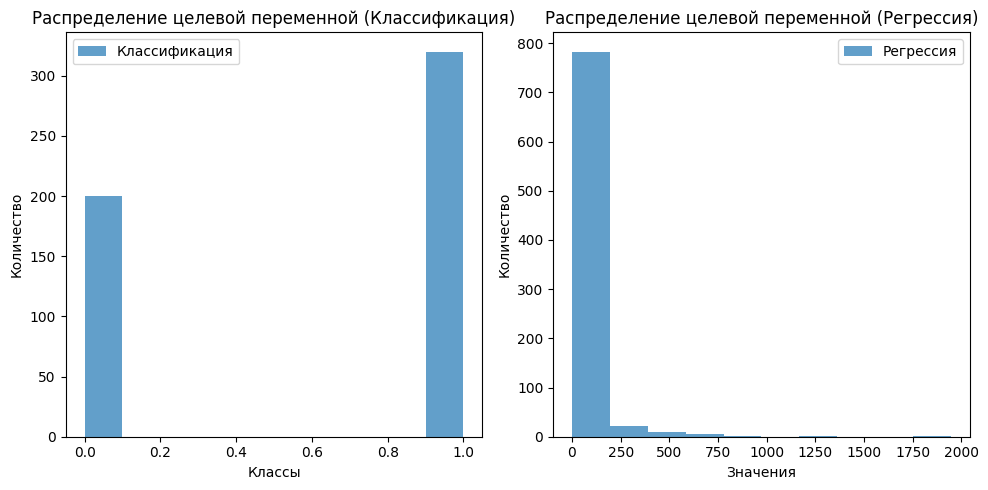

In [5]:
# Улучшение бейзлайна
# Визуализация распределения целевых переменных
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.hist(y_klass, bins=10, alpha=0.7, label='Классификация')
plt.title('Распределение целевой переменной (Классификация)')
plt.xlabel('Классы')
plt.ylabel('Количество')
plt.legend()

plt.subplot(1, 2, 2)
plt.hist(y_reg, bins=10, alpha=0.7, label='Регрессия')
plt.title('Распределение целевой переменной (Регрессия)')
plt.xlabel('Значения')
plt.ylabel('Количество')
plt.legend()

plt.tight_layout()
plt.show()

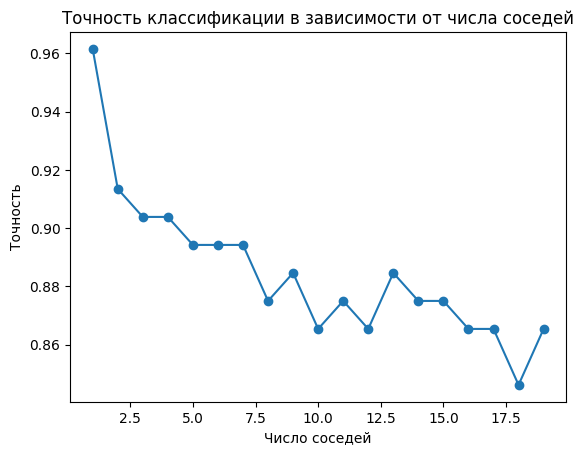

In [6]:
# Подбор гиперпараметров для классификации
neighbors_range = range(1, 20)
accuracy_scores = []

for n in neighbors_range:
    knn = KNeighborsClassifier(n_neighbors=n)
    knn.fit(X_train_klass, y_train_klass)
    y_pred = knn.predict(X_test_klass)
    accuracy_scores.append(accuracy_score(y_test_klass, y_pred))

# Визуализация точности для классификации
plt.figure()
plt.plot(neighbors_range, accuracy_scores, marker='o')
plt.title('Точность классификации в зависимости от числа соседей')
plt.xlabel('Число соседей')
plt.ylabel('Точность')
plt.show()


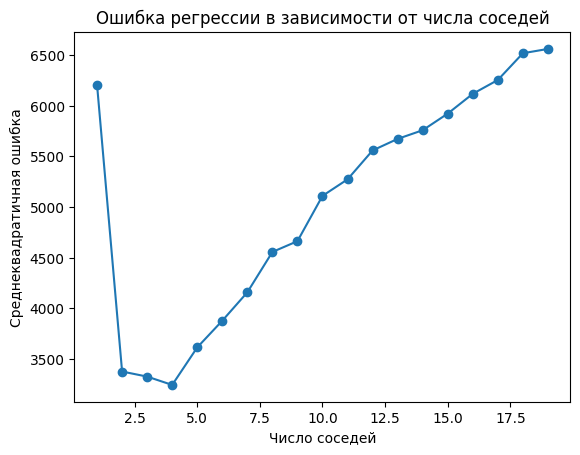

In [7]:
# Подбор гиперпараметров для регрессии
mse_scores = []

for n in neighbors_range:
    knn = KNeighborsRegressor(n_neighbors=n)
    knn.fit(X_train_reg, y_train_reg)
    y_pred = knn.predict(X_test_reg)
    mse_scores.append(mean_squared_error(y_test_reg, y_pred))

# Визуализация ошибки для регрессии
plt.figure()
plt.plot(neighbors_range, mse_scores, marker='o')
plt.title('Ошибка регрессии в зависимости от числа соседей')
plt.xlabel('Число соседей')
plt.ylabel('Среднеквадратичная ошибка')
plt.show()

In [8]:
# Обучение моделей с улучшенными параметрами
best_n_klass = neighbors_range[np.argmax(accuracy_scores)]
best_n_reg = neighbors_range[np.argmin(mse_scores)]

# Классификация с лучшими параметрами
knn_classifier = KNeighborsClassifier(n_neighbors=best_n_klass)
knn_classifier.fit(X_train_klass, y_train_klass)
y_pred_klass = knn_classifier.predict(X_test_klass)
klass_accuracy = accuracy_score(y_test_klass, y_pred_klass)

# Регрессия с лучшими параметрами
knn_regressor = KNeighborsRegressor(n_neighbors=best_n_reg)
knn_regressor.fit(X_train_reg, y_train_reg)
y_pred_reg = knn_regressor.predict(X_test_reg)
reg_mse = mean_squared_error(y_test_reg, y_pred_reg)

# Вывод результатов улучшенных моделей
print(f"Улучшенная точность классификации KNN: {klass_accuracy:.4f}")
print(f"Улучшенная среднеквадратичная ошибка регрессии KNN: {reg_mse:.4f}")

Улучшенная точность классификации KNN: 0.9615
Улучшенная среднеквадратичная ошибка регрессии KNN: 3241.6818


In [9]:
# Имплементация алгоритма KNN вручную
class CustomKNN:
    def __init__(self, n_neighbors=3):
        self.n_neighbors = n_neighbors

    def fit(self, X, y):
        self.X_train = np.array(X)
        self.y_train = np.array(y)

    def predict(self, X):
        X = np.array(X)
        predictions = []
        for x in X:
            distances = np.linalg.norm(self.X_train - x, axis=1)
            neighbors_indices = np.argsort(distances)[:self.n_neighbors]
            neighbor_labels = self.y_train[neighbors_indices]
            predictions.append(np.bincount(neighbor_labels).argmax())
        return np.array(predictions)

# Пример использования CustomKNN для классификации
custom_knn_classifier = CustomKNN(n_neighbors=best_n_klass)
custom_knn_classifier.fit(X_train_klass, y_train_klass)
y_pred_custom_klass = custom_knn_classifier.predict(X_test_klass)
custom_klass_accuracy = accuracy_score(y_test_klass, y_pred_custom_klass)

print(f"Точность классификации с помощью CustomKNN: {custom_klass_accuracy:.4f}")


Точность классификации с помощью CustomKNN: 0.9615
